# Projet Aéroport ghetto

## Mission 1 : Se familiariser avec les données

Questions : 

Combien y-a-t-il d’aéroports en tout, de départ et de destination ?

Combien y-a-t-il d’aéroports où on ne passe pas à l’heure d’été et de fuseaux horaires ?

In [1]:
import pandas as pd

# Lire le fichier Excel des aéroports
df_aeroports = pd.read_excel('airports.xlsx', engine='openpyxl')

# 1. Compter le nombre total d'aéroports
total_airports = df_aeroports['faa'].nunique()

# 2. Compter le nombre d'aéroports où l'heure d'été n'est pas observée
no_dst_airports = df_aeroports[df_aeroports['dst'] == 'N']['faa'].nunique()

# 3. Compter le nombre de fuseaux horaires distincts
distinct_timezones = df_aeroports['tzone'].nunique()

print("Nombre total d'aéroports :", total_airports)
print("Nombre d'aéroports sans heure d'été :", no_dst_airports)
print("Nombre de fuseaux horaires distincts :", distinct_timezones)

Nombre total d'aéroports : 1458
Nombre d'aéroports sans heure d'été : 23
Nombre de fuseaux horaires distincts : 10


Combien y-a-t-il de compagnies, d’avions, de vols annulés ? 

In [2]:
import json

# Charger le fichier JSON des compagnies aériennes
with open('airlines.json', 'r') as file:
    data = json.load(file)

# Compter le nombre de compagnies aériennes
total_airlines = len(data)

print("Nombre total de compagnies aériennes :", total_airlines)

Nombre total de compagnies aériennes : 16


In [3]:
# Charger le fichier HTML et lire les données de la table
df_planes = pd.read_html('planes.html')[0]

# Compter les avions uniques par 'tailnum'
total_planes = df_planes['tailnum'].nunique()

print("Nombre total d'avions :", total_planes)

Nombre total d'avions : 3322


In [4]:
import pandas as pd

# Lire le fichier Excel
df_flights = pd.read_excel('flights.xlsx', engine='openpyxl', header=None)

# Séparer la colonne A en plusieurs colonnes en utilisant la virgule comme séparateur
df_split = df_flights[0].str.split(',', expand=True)

# Ajouter les noms des colonnes
df_split.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 
                    'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 
                    'minute', 'time_hour']

# Remplacer les valeurs manquantes dans 'dep_time' par NaN (pour indiquer des vols annulés)
df_split['dep_time'] = pd.to_numeric(df_split['dep_time'], errors='coerce')

# Compter le nombre de vols annulés (où 'dep_time' est NaN)
vols_annules = df_split['dep_time'].isna().sum()

print("Nombre de vols annulés :", vols_annules)

Nombre de vols annulés : 6482


Quel est l’aéroport de départ le plus emprunté ?

In [5]:
# Compter le nombre de vols pour chaque aéroport de départ
airport_counts = df_split['origin'].value_counts()

# Trouver l'aéroport le plus emprunté
most_used_airport = airport_counts.idxmax()
most_used_count = airport_counts.max()

print(f"L'aéroport de départ le plus emprunté est {most_used_airport} avec {most_used_count} vols.")

L'aéroport de départ le plus emprunté est EWR avec 91241 vols.


Quelles sont les 10 destinations les plus et moins prisées ?

In [30]:
import pandas as pd

# Charger le fichier des vols
df_vols = pd.read_excel('flights.xlsx', header=None, engine='openpyxl')

# Séparer la colonne A en plusieurs colonnes
df_split = df_vols[0].str.split(',', expand=True)
df_split.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 
                    'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 
                    'minute', 'time_hour']

# Charger le fichier des aéroports (qui contient le nom des destinations)
df_airports = pd.read_excel('airports.xlsx', engine='openpyxl')

# Compter le nombre de vols par destination
destination_counts = df_split['dest'].value_counts()

# Calculer le pourcentage de vols pour chaque destination
total_vols = len(df_split)
destination_percentage = (destination_counts / total_vols) * 100

# Fusionner avec le fichier des aéroports pour obtenir les noms des destinations
df_destinations = pd.DataFrame({
    'dest': destination_counts.index,
    'count': destination_counts.values,
    'percentage': destination_percentage.values
})
df_destinations = df_destinations.merge(df_airports, left_on='dest', right_on='faa', how='left')

# Trier les destinations
top_10_destinations = df_destinations.head(10)  # Les 10 destinations les plus prisées
bottom_10_destinations = df_destinations.tail(10)  # Les 10 destinations les moins prisées

# Afficher les résultats
print("Les 10 destinations les plus prisées :")
display(top_10_destinations[['name', 'count', 'percentage']])

print("\nLes 10 destinations les moins prisées :")
display(bottom_10_destinations[['name', 'count', 'percentage']])

Les 10 destinations les plus prisées :


,name,count,percentage
0,Hartsfield Jackson Atlanta Intl,12946,5.122969
1,Chicago Ohare Intl,12654,5.007420
2,Los Angeles Intl,11895,4.707070
3,General Edward Lawrence Logan Intl,11560,4.574504
4,Orlando Intl,10637,4.209256
5,Charlotte Douglas Intl,10448,4.134465
6,San Francisco Intl,9729,3.849944
7,Fort Lauderdale Hollywood Intl,9443,3.736768
8,Miami Intl,8938,3.536930
9,Ronald Reagan Washington Natl,7386,2.922776



Les 10 destinations les moins prisées :


,name,count,percentage
94,Jackson Hole Airport,25,0.009893
95,Gallatin Field,20,0.007914
96,Palm Springs Intl,19,0.007519
97,Key West Intl,17,0.006727
98,Cherry Capital Airport,16,0.006331
99,Montrose Regional Airport,15,0.005936
100,Yampa Valley,15,0.005936
101,South Bend Rgnl,4,0.001583
102,Blue Grass,1,0.000396
103,NaN,1,0.000396


Quelle sont les 10 avions qui ont le plus et le moins décollé ?

In [28]:
import pandas as pd

# Charger le fichier des vols
df_vols = pd.read_excel('flights.xlsx', header=None, engine='openpyxl')

# Séparer la colonne A en plusieurs colonnes
df_split = df_vols[0].str.split(',', expand=True)
df_split.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 
                    'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 
                    'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour']

# Charger le fichier des avions
df_planes = pd.read_html('planes.html')[0]

# Compter le nombre de vols par avion (tailnum)
avion_counts = df_split['tailnum'].value_counts().reset_index()
avion_counts.columns = ['tailnum', 'count']

# Fusionner avec les données des avions pour obtenir les modèles
df_avion_modele = avion_counts.merge(df_planes, on='tailnum', how='left')

# Trier par le nombre de vols
top_10_avions = df_avion_modele.head(10)  # Les 10 avions les plus utilisés
bottom_10_avions = df_avion_modele.tail(10)  # Les 10 avions les moins utilisés

# Afficher les résultats avec display()
print("Les 10 avions qui ont le plus décollé :")
display(top_10_avions[['tailnum', 'model', 'count']])

print("\nLes 10 avions qui ont le moins décollé :")
display(bottom_10_avions[['tailnum', 'model', 'count']])

Les 10 avions qui ont le plus décollé :


,tailnum,model,count
0,,NaN,1973
1,N725MQ,NaN,443
2,N723MQ,NaN,394
3,N713MQ,NaN,385
4,N722MQ,NaN,378
5,N711MQ,G1159B,376
6,N258JB,ERJ 190-100 IGW,332
7,N353JB,ERJ 190-100 IGW,316
8,N542MQ,NaN,310
9,N351JB,ERJ 190-100 IGW,310



Les 10 avions qui ont le moins décollé :


,tailnum,model,count
3974,N908FJ,CL-600-2D24,1
3975,N824AW,A319-132,1
3976,N871AS,CL-600-2B19,1
3977,N928EV,CL-600-2B19,1
3978,N660SW,737-301,1
3979,N669SW,737-3A4,1
3980,N3LFAA,NaN,1
3981,N7713A,737-7BD,1
3982,N7BMAA,NaN,1
3983,N352NB,A319-114,1


Combien chaque compagnie a desservi de destination ? Combien chaque compagnie a desservie de destination par aéroport d’origine ?

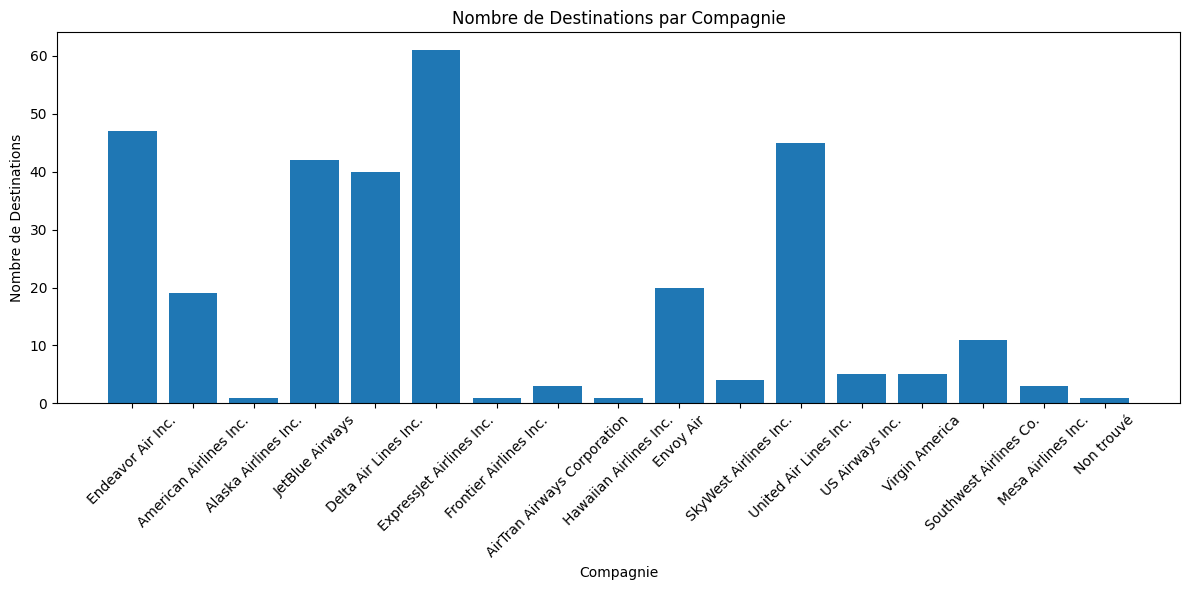

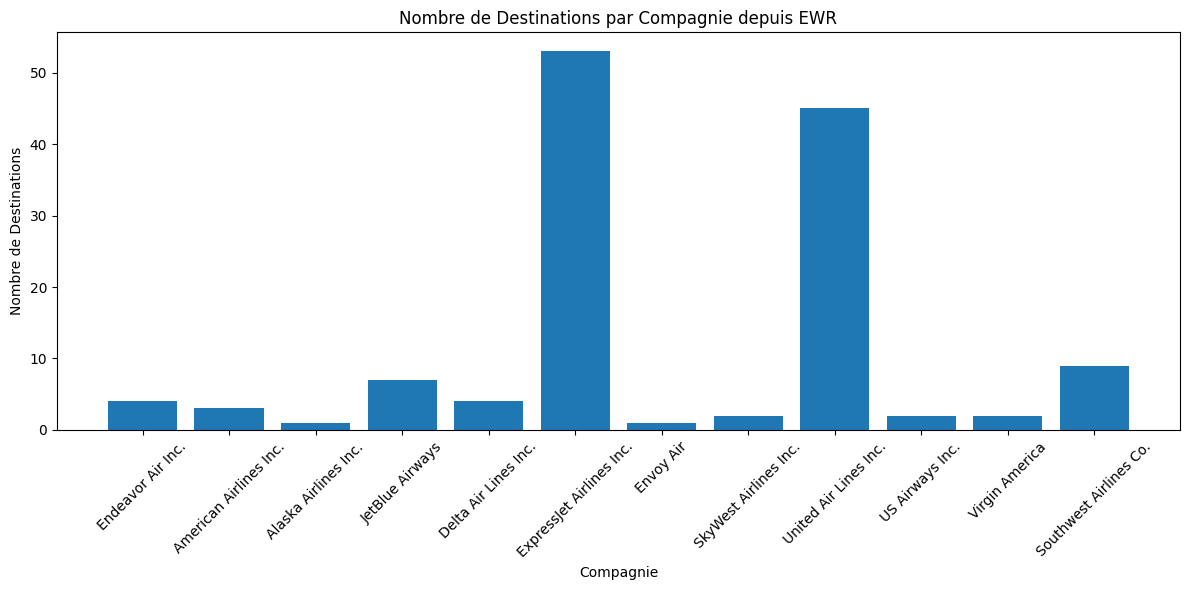

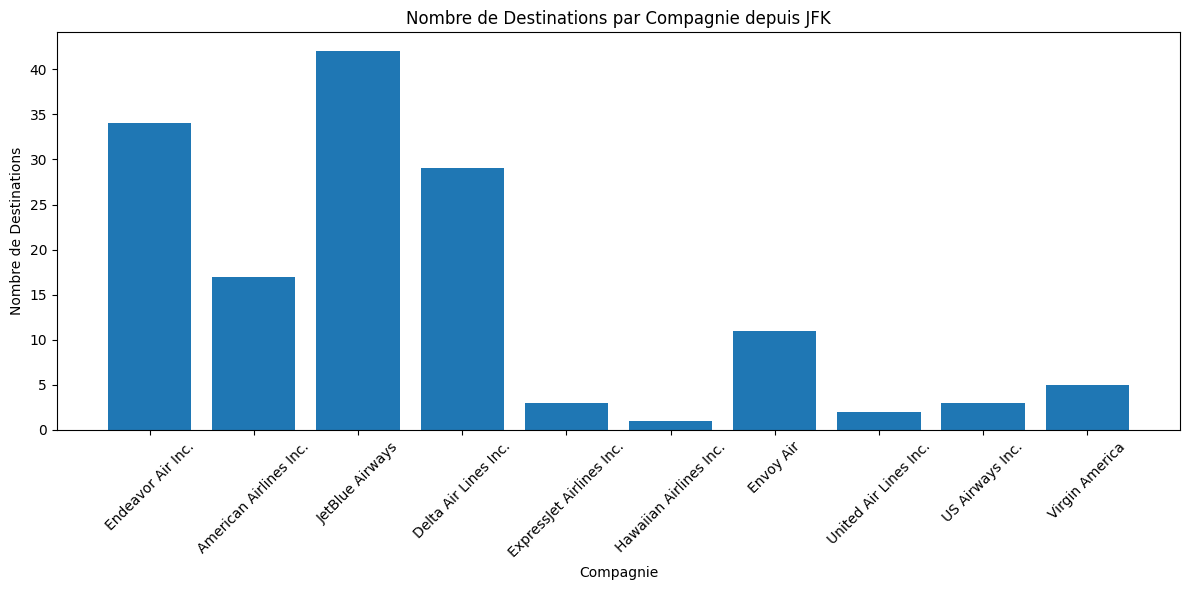

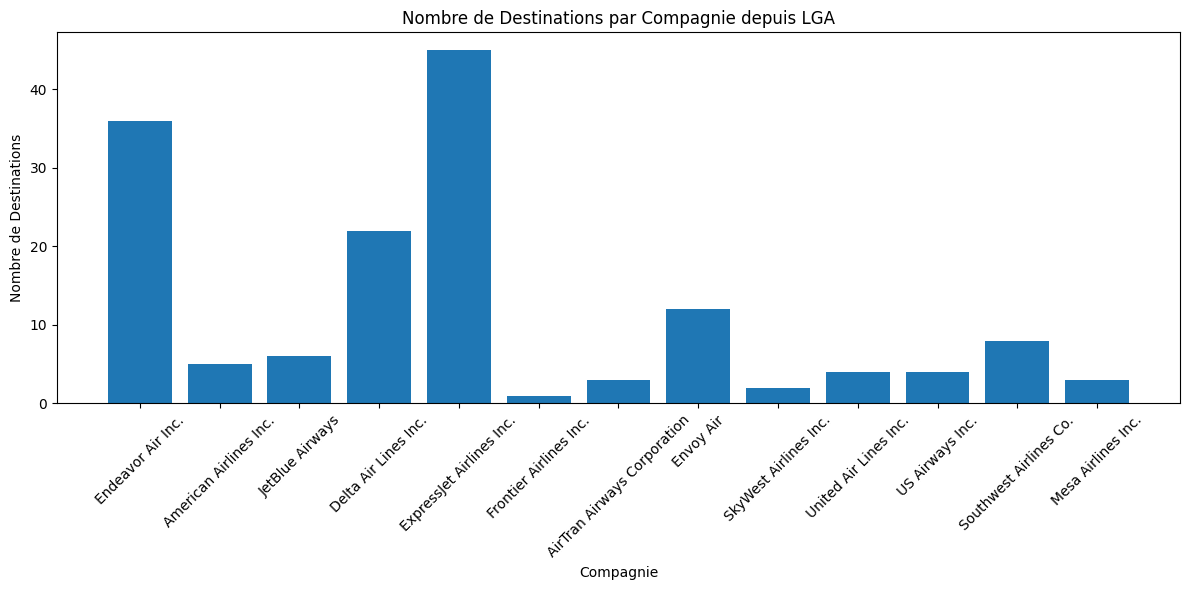

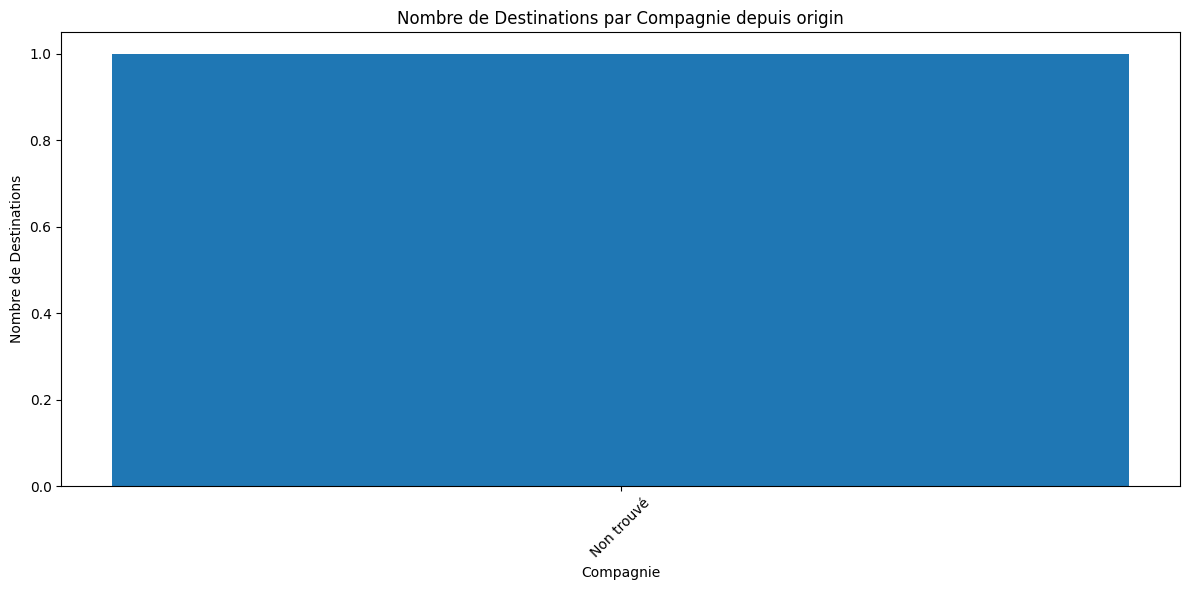

In [33]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Charger les données des compagnies aériennes
with open('airlines.json') as f:
    airlines = json.load(f)

# Charger le fichier des aéroports
airports = pd.read_excel('airports.xlsx')

# Charger le fichier des vols
df_vols = pd.read_excel('flights.xlsx', header=None, engine='openpyxl')

# Séparer la colonne A en plusieurs colonnes
df_split = df_vols[0].str.split(',', expand=True)
df_split.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 
                    'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 
                    'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour']

# Compter le nombre de destinations par compagnie
dest_counts = df_split.groupby('carrier')['dest'].nunique().reset_index()
dest_counts.columns = ['Carrier', 'Unique Destinations']

# Créer un dictionnaire des compagnies
airline_dict = {airline['carrier']: airline['name'] for airline in airlines}
dest_counts['Carrier Name'] = dest_counts['Carrier'].map(airline_dict)

# Remplacer les valeurs manquantes par une chaîne vide
dest_counts['Carrier Name'].fillna('Non trouvé', inplace=True)

# Graphique du nombre de destinations par compagnie
plt.figure(figsize=(12, 6))
plt.bar(dest_counts['Carrier Name'], dest_counts['Unique Destinations'])
plt.xticks(rotation=45)
plt.title('Nombre de Destinations par Compagnie')
plt.xlabel('Compagnie')
plt.ylabel('Nombre de Destinations')
plt.tight_layout()
plt.show()

# Compter le nombre de destinations par compagnie et par aéroport d'origine
orig_dest_counts = df_split.groupby(['origin', 'carrier'])['dest'].nunique().reset_index()
orig_dest_counts.columns = ['Origin', 'Carrier', 'Unique Destinations']

# Ajouter les noms des compagnies
orig_dest_counts['Carrier Name'] = orig_dest_counts['Carrier'].map(airline_dict)

# Remplacer les valeurs manquantes par une chaîne vide
orig_dest_counts['Carrier Name'].fillna('Non trouvé', inplace=True)

# Visualiser les résultats pour chaque aéroport
for origin in orig_dest_counts['Origin'].unique():
    plt.figure(figsize=(12, 6))
    data = orig_dest_counts[orig_dest_counts['Origin'] == origin]
    plt.bar(data['Carrier Name'], data['Unique Destinations'])
    plt.xticks(rotation=45)
    plt.title(f'Nombre de Destinations par Compagnie depuis {origin}')
    plt.xlabel('Compagnie')
    plt.ylabel('Nombre de Destinations')
    plt.tight_layout()
    plt.show()

Trouver tous les vols ayant atterri à Houston (IAH ou HOU) ? Combien de vols partent de NYC airports vers Seattle, combien de compagnies desservent cette destination et combien d’avions “uniques” ? 

In [34]:
import pandas as pd

# Charger le fichier des vols
df_vols = pd.read_excel('flights.xlsx', header=None, engine='openpyxl')

# Séparer la colonne A en plusieurs colonnes
df_split = df_vols[0].str.split(',', expand=True)
df_split.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 
                    'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 
                    'minute', 'time_hour']

# Tous les vols ayant atterri à Houston (IAH ou HOU)
houston_flights = df_split[df_split['dest'].isin(['IAH', 'HOU'])][['origin', 'dest']]

# Compter le nombre de vols
nombre_vols = len(houston_flights)

# Afficher le nombre de vols et les résultats filtrés
print(f"Nombre de vols atterrissant à Houston (IAH ou HOU) : {nombre_vols}")

# Filtrer les vols partant de New York vers Seattle
ny_airports = ['JFK', 'LGA', 'EWR']  # Codes des aéroports de New York
seattle_airport = 'SEA'  # Code de l'aéroport de Seattle

# Filtrer les données
ny_to_seattle_flights = df_split[
    (df_split['origin'].isin(ny_airports)) & (df_split['dest'] == seattle_airport)
]

# Compter le nombre de vols
nombre_vols = ny_to_seattle_flights.shape[0]

# Compter le nombre de compagnies desservant Seattle
nombre_compagnies = ny_to_seattle_flights['carrier'].nunique()

# Compter le nombre d'avions uniques
nombre_avions_uniques = ny_to_seattle_flights['tailnum'].nunique()

# Afficher les résultats
print(f"Nombre de vols partant de NYC vers Seattle : {nombre_vols}")
print(f"Nombre de compagnies desservant Seattle : {nombre_compagnies}")
print(f"Nombre d'avions uniques : {nombre_avions_uniques}")

Nombre de vols atterrissant à Houston (IAH ou HOU) : 6958
Nombre de vols partant de NYC vers Seattle : 2736
Nombre de compagnies desservant Seattle : 5
Nombre d'avions uniques : 857


Q5 : Trouver le nombre de vols par destination ? Trier les vols suivant la destination, l’aéroport d’origine, la compagnie dans un ordre alphabétique croissant (en réalisant les jointures nécessaires pour obtenir les noms explicites des aéroports) ?

In [54]:
import pandas as pd
import json

# Charger les données des compagnies aériennes
with open('airlines.json') as f:
    airlines = json.load(f)

# Charger les fichiers Excel
airports = pd.read_excel('airports.xlsx')
df_vols = pd.read_excel('flights.xlsx', header=None, engine='openpyxl')

# Séparer la colonne A en plusieurs colonnes
df_split = df_vols[0].str.split(',', expand=True)
df_split.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 
                    'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 
                    'flight', 'tailnum', 'origin', 'dest', 'air_time', 
                    'distance', 'hour', 'minute', 'time_hour']

# Créer un dictionnaire des compagnies
airline_dict = {airline['carrier']: airline['name'] for airline in airlines}

# Ajouter les noms des compagnies dans df_split
df_split['Carrier Name'] = df_split['carrier'].map(airline_dict)

# Compter le nombre de vols par destination
flights_per_dest = df_split['dest'].value_counts().reset_index()
flights_per_dest.columns = ['dest', 'number_of_flights']

# Jointure avec les noms des aéroports pour obtenir les noms complets des destinations
flights_per_dest = flights_per_dest.merge(airports[['faa', 'name']], left_on='dest', right_on='faa', how='left')
flights_per_dest.rename(columns={'name': 'destination_name'}, inplace=True)

# Ajouter le nom des compagnies à df_split
df_split = df_split.merge(airports[['faa', 'name']], left_on='origin', right_on='faa', how='left')
df_split.rename(columns={'name': 'origin_name'}, inplace=True)

# Trier par destination, aéroport d’origine et compagnie
flights_sorted = df_split.sort_values(by=['dest', 'origin', 'Carrier Name'])

# Afficher les résultats
print("Nombre de vols par destination:")
display(flights_per_dest)

print("\nVols triés par destination, aéroport d'origine et compagnie:")
display(flights_sorted[['origin_name', 'dest', 'Carrier Name']])


Nombre de vols par destination:


,dest,number_of_flights,faa,destination_name
0,ATL,12946,ATL,Hartsfield Jackson Atlanta Intl
1,ORD,12654,ORD,Chicago Ohare Intl
2,LAX,11895,LAX,Los Angeles Intl
3,BOS,11560,BOS,General Edward Lawrence Logan Intl
4,MCO,10637,MCO,Orlando Intl
...,...,...,...,...
99,MTJ,15,MTJ,Montrose Regional Airport
100,HDN,15,HDN,Yampa Valley
101,SBN,4,SBN,South Bend Rgnl
102,LEX,1,LEX,Blue Grass



Vols triés par destination, aéroport d'origine et compagnie:


,origin_name,dest,Carrier Name
27882,John F Kennedy Intl,ABQ,JetBlue Airways
28868,John F Kennedy Intl,ABQ,JetBlue Airways
29831,John F Kennedy Intl,ABQ,JetBlue Airways
30849,John F Kennedy Intl,ABQ,JetBlue Airways
31580,John F Kennedy Intl,ABQ,JetBlue Airways
...,...,...,...
251961,La Guardia,XNA,Envoy Air
252111,La Guardia,XNA,Envoy Air
252450,La Guardia,XNA,Envoy Air
225253,La Guardia,XNA,ExpressJet Airlines Inc.


Quelles sont les compagnies qui n'opèrent pas sur tous les aéroports d’origine ? Quelles sont les compagnies qui desservent l’ensemble de destinations ?
Faire un tableau où l’on récupère l’ensemble des origines et des destinations pour l’ensemble des compagnies. 

In [24]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Charger les données des compagnies aériennes
with open('airlines.json') as f:
    airlines = json.load(f)

# Charger les fichiers Excel
airports = pd.read_excel('airports.xlsx')
df_vols = pd.read_excel('flights.xlsx', header=None, engine='openpyxl')

# Séparer la colonne A en plusieurs colonnes
df_split = df_vols[0].str.split(',', expand=True)
df_split.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 
                    'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 
                    'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour']

# Créer un dictionnaire des compagnies
airline_dict = {airline['carrier']: airline['name'] for airline in airlines}

# Ajouter les noms des compagnies dans df_split
df_split['Carrier Name'] = df_split['carrier'].map(airline_dict)

# Liste des aéroports d'origine et de destinations
all_origins = df_split['origin'].unique()
all_destinations = df_split['dest'].unique()

# Groupement par compagnie pour obtenir les origines et destinations uniques
carrier_dest_counts = df_split.groupby('carrier')['dest'].nunique().reset_index()
carrier_dest_counts.columns = ['Carrier', 'Unique Destinations']

# Compter les origines pour chaque compagnie
carrier_origin_counts = df_split.groupby('carrier')['origin'].nunique().reset_index()
carrier_origin_counts.columns = ['Carrier', 'Unique Origins']

# Vérifier les compagnies qui desservent toutes les destinations
full_dest_count = df_split['dest'].nunique()  # Compte le nombre total de destinations uniques
carrier_full_dest = carrier_dest_counts[carrier_dest_counts['Unique Destinations'] == full_dest_count]

# Compter les origines pour chaque compagnie
all_origin_count = len(all_origins)
non_full_origin_companies = carrier_origin_counts[carrier_origin_counts['Unique Origins'] < all_origin_count]

# Ajouter les noms des compagnies pour les compagnies qui n'opèrent pas sur tous les aéroports d'origine
non_full_origin_companies['Carrier Name'] = non_full_origin_companies['Carrier'].map(airline_dict)

# Affichage des résultats avec display()
print("Compagnies qui n'opèrent pas sur tous les aéroports d'origine:")
display(non_full_origin_companies[['Carrier Name', 'Unique Origins']])

# Vérifier si le DataFrame est vide
if carrier_full_dest.empty:
    print("\nAucune compagnie ne desserve toutes les destinations (0 compagnie).")
else:
    print("\nCompagnies qui desservent toutes les destinations:")
    display(carrier_full_dest)

# Créer un tableau récapitulatif avec toutes les origines et destinations
all_routes = df_split[['Carrier Name', 'origin', 'dest']].drop_duplicates()

# Afficher le tableau récapitulatif
print("\nTableau récapitulatif des routes (origines et destinations) pour chaque compagnie:")
display(all_routes)

Compagnies qui n'opèrent pas sur tous les aéroports d'origine:


,Carrier Name,Unique Origins
0,Endeavor Air Inc.,3
1,American Airlines Inc.,3
2,Alaska Airlines Inc.,1
3,JetBlue Airways,3
4,Delta Air Lines Inc.,3
5,ExpressJet Airlines Inc.,3
6,Frontier Airlines Inc.,1
7,AirTran Airways Corporation,1
8,Hawaiian Airlines Inc.,1
9,Envoy Air,3



Aucune compagnie ne desserve toutes les destinations (0 compagnie).

Tableau récapitulatif des routes (origines et destinations) pour chaque compagnie:


,Carrier Name,origin,dest
0,NaN,origin,dest
1,United Air Lines Inc.,EWR,IAH
2,United Air Lines Inc.,LGA,IAH
3,American Airlines Inc.,JFK,MIA
4,JetBlue Airways,JFK,BQN
...,...,...,...
235072,Envoy Air,LGA,TVC
235658,Endeavor Air Inc.,LGA,BTV
235827,ExpressJet Airlines Inc.,LGA,MYR
235892,SkyWest Airlines Inc.,EWR,DTW


Quelles sont les destinations qui sont exclusives à certaines compagnies ? 

In [23]:
import pandas as pd
import json

# Charger les données des compagnies aériennes
with open('airlines.json') as f:
    airlines = json.load(f)

# Charger les fichiers Excel
airports = pd.read_excel('airports.xlsx')
df_vols = pd.read_excel('flights.xlsx', header=None, engine='openpyxl')

# Séparer la colonne A en plusieurs colonnes
df_split = df_vols[0].str.split(',', expand=True)
df_split.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 
                    'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 
                    'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour']

# Créer un dictionnaire des compagnies
airline_dict = {airline['carrier']: airline['name'] for airline in airlines}

# Ajouter les noms des compagnies dans df_split
df_split['Carrier Name'] = df_split['carrier'].map(airline_dict)

# Trouver les destinations desservies par chaque compagnie
destination_counts = df_split.groupby('dest')['carrier'].unique().reset_index()
destination_counts.columns = ['Destination', 'Carriers']

# Filtrer les destinations qui ne sont desservies que par une seule compagnie
exclusive_destinations = destination_counts[destination_counts['Carriers'].str.len() == 1].copy()

# Utiliser .loc pour éviter SettingWithCopyWarning
exclusive_destinations.loc[:, 'Exclusive Carrier'] = exclusive_destinations['Carriers'].apply(lambda x: x[0])
exclusive_destinations = exclusive_destinations[['Destination', 'Exclusive Carrier']]

# Remplacer les abréviations par les noms des compagnies
exclusive_destinations['Exclusive Carrier'] = exclusive_destinations['Exclusive Carrier'].map(airline_dict)

# Joindre les noms des destinations à partir de airports.xlsx
exclusive_destinations = exclusive_destinations.merge(airports[['faa', 'name']], 
                                                      left_on='Destination', 
                                                      right_on='faa', 
                                                      how='left')

# Renommer les colonnes pour plus de clarté
exclusive_destinations.rename(columns={'name': 'Destination Name'}, inplace=True)

# Conserver les colonnes souhaitées
exclusive_destinations = exclusive_destinations[['Destination Name', 'Exclusive Carrier']]

# Affichage des résultats sous forme de tableau
print("Destinations exclusives à certaines compagnies:")
display(exclusive_destinations)  # Utiliser display pour un affichage amélioré

Destinations exclusives à certaines compagnies:


,Destination Name,Exclusive Carrier
0,Albuquerque International Sunport,JetBlue Airways
1,Nantucket Mem,JetBlue Airways
2,Albany Intl,ExpressJet Airlines Inc.
3,Birmingham Intl,ExpressJet Airlines Inc.
4,Bob Hope,JetBlue Airways
5,Gallatin Field,United Air Lines Inc.
6,Akron Canton Regional Airport,AirTran Airways Corporation
7,Charlottesville-Albemarle,ExpressJet Airlines Inc.
8,Yeager,Envoy Air
9,Key West Intl,Delta Air Lines Inc.


Filtrer le vol pour trouver ceux exploités par United, American ou Delta ?

In [43]:
import pandas as pd

# Charger le fichier des vols
df_vols = pd.read_excel('flights.xlsx', header=None, engine='openpyxl')

# Séparer la colonne A en plusieurs colonnes
df_split = df_vols[0].str.split(',', expand=True)
df_split.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 
                    'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 
                    'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour']

# Filtrer les vols pour United (UA), American (AA) et Delta (DL)
carriers_to_filter = ['UA', 'AA', 'DL']
filtered_flights = df_split[df_split['carrier'].isin(carriers_to_filter)]

# Afficher les résultats
print("Vols exploités par United, American ou Delta :")
display(filtered_flights)

Vols exploités par United, American ou Delta :


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2021,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2021-01-01T05:00:00Z
2,2021,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2021-01-01T05:00:00Z
3,2021,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2021-01-01T05:00:00Z
5,2021,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2021-01-01T06:00:00Z
6,2021,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2021-01-01T05:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252690,2021,7,3,1048,1055,-7,1330,1347,-17,DL,1275,N389DA,JFK,SLC,256,1990,10,55,2021-07-03T10:00:00Z
252693,2021,7,3,1052,1100,-8,1328,1332,-4,UA,1695,N76522,EWR,IAH,189,1400,11,0,2021-07-03T11:00:00Z
252696,2021,7,3,1056,1055,1,1359,1411,-12,DL,1903,N364NB,LGA,SRQ,154,1047,10,55,2021-07-03T10:00:00Z
252697,2021,7,3,1057,1059,-2,1249,1307,-18,UA,765,N469UA,EWR,DEN,202,1605,10,59,2021-07-03T10:00:00Z


## Mission 2

Création de la base de données ainsi que des tables avec relations

In [4]:
import psycopg2
import pandas as pd
import json
import requests

# Requêtes SQL pour créer les tables dans le bon ordre
create_tables_queries = [
    '''CREATE TABLE IF NOT EXISTS airlines (
        carrier VARCHAR(2) PRIMARY KEY,
        name VARCHAR(255)
    );''',

    '''CREATE TABLE IF NOT EXISTS airports (
        faa VARCHAR(3) PRIMARY KEY,
        name VARCHAR(255),
        lat DECIMAL(9, 6),
        lon DECIMAL(9, 6),
        alt INT,
        tz INT,
        dst CHAR(1),
        tzone VARCHAR(255)
    );''',

    '''CREATE TABLE IF NOT EXISTS planes (
        tailnum VARCHAR(10) PRIMARY KEY,
        year INT,
        type VARCHAR(50),
        manufacturer VARCHAR(255),
        model VARCHAR(50),
        engines INT,
        seats INT,
        speed INT,
        engine VARCHAR(50)
    );''',

    '''CREATE TABLE IF NOT EXISTS flights (
        year INT,
        month INT,
        day INT,
        dep_time INT,
        arr_time INT,
        sched_dep_time INT,
        sched_arr_time INT,
        dep_delay INT,
        arr_delay INT,
        hour INT,
        minute INT,
        carrier VARCHAR(2),
        tailnum VARCHAR(10),
        flight VARCHAR(10),
        origin VARCHAR(3),
        dest VARCHAR(3),
        air_time INT,
        distance INT,
        time_hour TIMESTAMP,
        PRIMARY KEY (year, month, day, flight),
        FOREIGN KEY (carrier) REFERENCES airlines(carrier),
        FOREIGN KEY (origin) REFERENCES airports(faa),
        FOREIGN KEY (dest) REFERENCES airports(faa),
        FOREIGN KEY (tailnum) REFERENCES planes(tailnum)
    );''',

    '''CREATE TABLE IF NOT EXISTS weather (
        origin VARCHAR(3),
        year INT,
        month INT,
        day INT,
        hour INT,
        temp DECIMAL(5, 2),
        dewp DECIMAL(5, 2),
        humid DECIMAL(5, 2),
        wind_dir INT,
        wind_speed DECIMAL(5, 2),
        wind_gust DECIMAL(5, 2),
        precip DECIMAL(5, 2),
        pressure DECIMAL(6, 2),
        visib DECIMAL(5, 2),
        time_hour TIMESTAMP,
        PRIMARY KEY (origin, year, month, day, hour),
        FOREIGN KEY (origin) REFERENCES airports(faa)
    );'''
]

def fetch_airport_data(airport_code):
    print("ok")
    api_url = f'https://port-api.com/airport/iata/{airport_code}'
    response = requests.get(api_url)  # Pas besoin de clé API pour cette API
    if response.status_code == requests.codes.ok:
        airport_info = response.json()
        
        # Vérifie si l'API a retourné des données
        if airport_info['type'] == 'Feature':
            properties = airport_info['properties']
            return {
                'faa': properties['iata'],
                'name': properties['name'],
                'lat': airport_info['geometry']['coordinates'][1],  # Latitude
                'lon': airport_info['geometry']['coordinates'][0],  # Longitude
                'alt': int(properties['elevation']),  # Convertir en entier
                'tz': int(properties.get('tz', 0)),  # Convertir en entier, utiliser 0 par défaut
                'dst': properties.get('source', 'N'),  # Utilise 'N' par défaut
                'tzone': properties.get('country', {}).get('name', 'N/A')  # Récupérer le nom du pays
            }
    else:
        print(f"Erreur lors de la récupération des données pour l'aéroport {airport_code}: {response.status_code}")
        return None


def insert_airport_data(connection, airport_data):
    # Vérifier la longueur de la valeur dst et la tronquer si nécessaire
    if airport_data['dst'] and len(airport_data['dst']) > 1:
        airport_data['dst'] = airport_data['dst'][0]  # Prendre seulement le premier caractère

    with connection.cursor() as cursor:
        cursor.execute(
            '''INSERT INTO airports (faa, name, lat, lon, alt, tz, dst, tzone) 
               VALUES (%s, %s, %s, %s, %s, %s, %s, %s) 
               ON CONFLICT (faa) DO NOTHING;''',
            (airport_data['faa'], airport_data['name'], airport_data['lat'],
             airport_data['lon'], airport_data['alt'], airport_data['tz'],
             airport_data['dst'], airport_data['tzone'])
        )
        connection.commit()
        print(f"Aéroport {airport_data['faa']} ajouté avec succès.")



# Fonction pour insérer les compagnies aériennes
def insert_airlines(connection):
    with open('airlines.json') as f:
        airlines_data = json.load(f)

    with connection.cursor() as cursor:
        for airline in airlines_data:
            cursor.execute(
                '''INSERT INTO airlines (carrier, name) VALUES (%s, %s) 
                   ON CONFLICT (carrier) DO NOTHING;''',
                (airline['carrier'], airline['name'])
            )
        connection.commit()
        print("Données des compagnies aériennes insérées avec succès.")

# Fonction pour insérer les 10 premiers aéroports
def insert_airports(connection):
    # Charger le fichier Excel
    airports_df = pd.read_excel('airports.xlsx')
    
    # Sauvegarder le fichier en CSV
    airports_df.to_csv('airports.csv', index=False, encoding='utf-8')
    
    # Charger le fichier CSV pour l'insertion
    airports_df_csv = pd.read_csv('airports.csv', encoding='utf-8')

    with connection.cursor() as cursor:
        # Insérer les 10 premiers aéroports
        for index, row in airports_df_csv.head(10).iterrows():
            cursor.execute(
                '''INSERT INTO airports (faa, name, lat, lon, alt, tz, dst, tzone) 
                   VALUES (%s, %s, %s, %s, %s, %s, %s, %s) 
                   ON CONFLICT (faa) DO NOTHING;''',
                (row['faa'], row['name'], row['lat'], row['lon'], row['alt'], row['tz'], row['dst'], row['tzone'])
            )
        connection.commit()
        print("Données des 10 premiers aéroports insérées avec succès.")


# Fonction pour insérer les vols
def insert_flights(connection):
    try:
        # Charger le fichier Excel
        flights_df = pd.read_excel('flights.xlsx')

        # Séparation des données
        df_split = flights_df.iloc[:, 0].str.split(',', expand=True)
        df_split.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 
                            'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 
                            'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour']

        cursor = connection.cursor()

        for index, row in df_split.iterrows():
            origin = row['origin']
            dest = row['dest']
            tailnum = row['tailnum']

            # Vérifier si l'aéroport d'origine existe
            cursor.execute("SELECT COUNT(*) FROM airports WHERE faa = %s;", (origin,))
            if cursor.fetchone()[0] == 0:
                airport_data = fetch_airport_data(origin)
                if airport_data:
                    insert_airport_data(connection, airport_data)

            # Vérifier si l'aéroport de destination existe
            cursor.execute("SELECT COUNT(*) FROM airports WHERE faa = %s;", (dest,))
            if cursor.fetchone()[0] == 0:
                airport_data = fetch_airport_data(dest)
                if airport_data:
                    insert_airport_data(connection, airport_data)

            # Insérer l'avion si manquant
            insert_planes_if_missing(connection, tailnum)

            # Préparation de la requête SQL d'insertion
            insert_query = """
            INSERT INTO flights (
                year, month, day, dep_time, sched_dep_time, dep_delay, arr_time, sched_arr_time,
                arr_delay, carrier, flight, tailnum, origin, dest, air_time, distance, hour, minute, time_hour
            ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            ON CONFLICT (year, month, day, flight) DO NOTHING;
            """

            try:
                cursor.execute(insert_query, (
                    int(row['year']), int(row['month']), int(row['day']),
                    int(row['dep_time']) if pd.notna(row['dep_time']) else None,
                    int(row['sched_dep_time']) if pd.notna(row['sched_dep_time']) else None,
                    int(row['dep_delay']) if pd.notna(row['dep_delay']) else None,
                    int(row['arr_time']) if pd.notna(row['arr_time']) else None,
                    int(row['sched_arr_time']) if pd.notna(row['sched_arr_time']) else None,
                    int(row['arr_delay']) if pd.notna(row['arr_delay']) else None,
                    row['carrier'], row['flight'], tailnum, origin, dest,
                    int(row['air_time']) if pd.notna(row['air_time']) else None,
                    int(row['distance']) if pd.notna(row['distance']) else None,
                    int(row['hour']), int(row['minute']),
                    pd.to_datetime(row['time_hour']) if pd.notna(row['time_hour']) else None
                ))
            except (ValueError, psycopg2.Error) as e:
                print(f"Erreur lors de l'insertion du vol {row['flight']} : {e}")
                continue  # Passer à la ligne suivante en cas d'erreur

        connection.commit()
        print(f"{df_split.shape[0]} vols insérés avec succès.")

    except KeyError as e:
        print(f"Erreur: Colonne manquante dans le fichier Excel : {e}")
    except Exception as e:
        print(f"Erreur lors de l'insertion des vols : {e}")
    finally:
        cursor.close()

def insert_planes_if_missing(connection, tailnum):
    with connection.cursor() as cursor:
        # Vérifier si l'avion existe déjà
        cursor.execute("SELECT COUNT(*) FROM planes WHERE tailnum = %s;", (tailnum,))
        if cursor.fetchone()[0] == 0:
            # Si l'avion n'existe pas, insérer avec des valeurs par défaut
            cursor.execute(
                '''INSERT INTO planes (tailnum, year, type, manufacturer, model, engines, seats, speed, engine) 
                   VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s) 
                   ON CONFLICT (tailnum) DO NOTHING;''',
                (tailnum, None, 'Nom Par Défaut', 'Fabricant Par Défaut', 'Modèle Par Défaut', 
                 None, None, None, 'Type de moteur Par Défaut')
            )
            print(f"Avion {tailnum} ajouté avec des valeurs par défaut.")
            
            # Ajouter le code pour vérifier les avions manquants dans les vols
            add_missing_airplanes(connection)

# Main
def main():
    try:
        # Connexion à la base de données
        connection = psycopg2.connect(
            user="imie-data",
            password="imiedata92",
            host="postgresql-imie-data.alwaysdata.net",
            port="5432",
            database="imie-data_airport"
        )

        # Vérifier la connexion
        with connection.cursor() as cursor:
            cursor.execute("SELECT version();")
            record = cursor.fetchone()
            print("Vous êtes connecté à - ", record)

        # Créer les tables
        with connection.cursor() as cursor:
            for query in create_tables_queries:
                cursor.execute(query)
            connection.commit()
            print("Tables avec relations créées avec succès")

        # Insérer les données
        #insert_airlines(connection)
        #insert_airports(connection)
        #insert_planes(connection)
        insert_flights(connection)
        #airport_data = fetch_airport_data("BQN")
        #print(airport_data)

    except (Exception, psycopg2.Error) as error:
        print("Erreur lors de la connexion ou de l'exécution des requêtes", error)

    finally:
        # Fermer la connexion à la base de données
        if connection:
            connection.close()
            print("La connexion PostgreSQL est fermée")

if __name__ == "__main__":
    main()


In [5]:
df_4 = (lambda: _deepnote_execute_sql('SELECT * FROM public.flights', 'SQL_04023B35_E3A3_44D4_9652_64825C3BD30D', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT * FROM public.flights', 'SQL_04023B35_E3A3_44D4_9652_64825C3BD30D', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_4

,year,month,day,dep_time,arr_time,sched_dep_time,sched_arr_time,dep_delay,arr_delay,hour,minute,carrier,tailnum,flight,origin,dest,air_time,distance,time_hour
0,2021,1,1,517,830,515,819,2,11,5,15,UA,N14228,1545,EWR,IAH,227,1400,2021-01-01 05:00:00
1,2021,1,1,533,850,529,830,4,20,5,29,UA,N24211,1714,LGA,IAH,227,1416,2021-01-01 05:00:00
2,2021,1,1,542,923,540,850,2,33,5,40,AA,N619AA,1141,JFK,MIA,160,1089,2021-01-01 05:00:00
3,2021,1,1,544,1004,545,1022,-1,-18,5,45,B6,N804JB,725,JFK,BQN,183,1576,2021-01-01 05:00:00
4,2021,1,1,554,812,600,837,-6,-25,6,0,DL,N668DN,461,LGA,ATL,116,762,2021-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2021,1,1,1657,1921,1650,1840,7,41,16,50,WN,N462WN,2773,EWR,STL,181,872,2021-01-01 16:00:00
525,2021,1,1,1657,1948,1630,1926,27,22,16,30,UA,N17105,1609,EWR,MCO,148,937,2021-01-01 16:00:00
526,2021,1,1,1658,1808,1700,1840,-2,-32,17,0,MQ,N688MQ,4323,JFK,ORF,52,290,2021-01-01 17:00:00
527,2021,1,1,1701,2026,1710,2015,-9,11,17,10,AA,N3FUAA,695,JFK,AUS,247,1521,2021-01-01 17:00:00


## Intégration des données dans la base de données

In [8]:
!pip install flask==3.0.3

In [9]:
!pip install openpyxl==3.1.5

In [10]:
from flask import Flask, render_template
import pandas as pd
import openpyxl

print(openpyxl.__version__)

app = Flask(__name__)

@app.route('/')
def home():
    # Charger les données des vols
    df_vols = pd.read_excel('flights.xlsx', header=None, engine='openpyxl')
    df_split = df_vols[0].str.split(',', expand=True)
    df_split.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 
                        'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 
                        'air_time', 'distance', 'hour', 'minute', 'time_hour']

    # Extrait un échantillon de 10 lignes
    sample_data = df_split.head(10).to_html()

    return render_template('index.html', tables=[sample_data])

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8080)

3.1.5
 * Serving Flask app '__main__'
 * Debug mode: off
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8080
 * Running on http://172.3.25.110:8080
Press CTRL+C to quit
172.3.182.236 - - [24/Oct/2024 14:26:44] "GET / HTTP/1.1" 200 -


In [2]:
df_1 = (lambda: _deepnote_execute_sql('SELECT * FROM public.airlines', 'SQL_04023B35_E3A3_44D4_9652_64825C3BD30D', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT * FROM public.airlines', 'SQL_04023B35_E3A3_44D4_9652_64825C3BD30D', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_1

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [6]:
df_2 = (lambda: _deepnote_execute_sql('SELECT * FROM public.planes', 'SQL_04023B35_E3A3_44D4_9652_64825C3BD30D', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT * FROM public.planes', 'SQL_04023B35_E3A3_44D4_9652_64825C3BD30D', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_2

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N3ALAA,NaN,Nom Par Défaut,Fabricant Par Défaut,Modèle Par Défaut,NaN,NaN,NaN,Type de moteur Par Défaut
1,N3DUAA,NaN,Nom Par Défaut,Fabricant Par Défaut,Modèle Par Défaut,NaN,NaN,NaN,Type de moteur Par Défaut
2,N542MQ,NaN,Nom Par Défaut,Fabricant Par Défaut,Modèle Par Défaut,NaN,NaN,NaN,Type de moteur Par Défaut
3,N730MQ,NaN,Nom Par Défaut,Fabricant Par Défaut,Modèle Par Défaut,NaN,NaN,NaN,Type de moteur Par Défaut
4,N9EAMQ,NaN,Nom Par Défaut,Fabricant Par Défaut,Modèle Par Défaut,NaN,NaN,NaN,Type de moteur Par Défaut
...,...,...,...,...,...,...,...,...,...
3403,N989AT,2001.0,Fixed wing multi engine,BOEING,717-200,2.0,100.0,NaN,Turbo-fan
3404,N989DL,1991.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2.0,142.0,NaN,Turbo-fan
3405,N990AT,2001.0,Fixed wing multi engine,BOEING,717-200,2.0,100.0,NaN,Turbo-fan
3406,N990DL,1991.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2.0,142.0,NaN,Turbo-fan


In [11]:
df_3 = (lambda: _deepnote_execute_sql('SELECT * FROM public.airports', 'SQL_04023B35_E3A3_44D4_9652_64825C3BD30D', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT * FROM public.airports', 'SQL_04023B35_E3A3_44D4_9652_64825C3BD30D', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_3

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=222f3a13-0f38-411a-852a-9cca7db612ca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>